## <center> IRIS Classification Using ANN

### Loading the dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 5)

In [7]:
data.isnull().mean()*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [8]:
data.duplicated().sum()

1

In [9]:
data.drop_duplicates(inplace=True)

### Label encoding the target column

In [10]:
LE = LabelEncoder()

In [11]:
data.species = LE.fit_transform(data.species)

In [12]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,1
74,6.4,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
104,6.5,3.0,5.8,2.2,2
100,6.3,3.3,6.0,2.5,2


In [13]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [18]:
dummy_y = to_categorical(y)

In [19]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,dummy_y,test_size=0.2,random_state=42,shuffle=True)

We can see that the target is now One Hot Encoded

### Buliding Artificial Neural Network model

In [21]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 163 (652.00 Byte)
Trainable params: 163 (652.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [22]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

### Early stopping callbacks

In [23]:
es = EarlyStopping(monitor= 'val_loss',mode= 'min',patience=10,restore_best_weights= True)

### Fitting the model

In [24]:
history = model.fit(x_train,y_train,callbacks=[es],epochs=500,batch_size = 30,validation_data= (x_test,y_test))

Epoch 1/500
4/4 [==============================] - 1s 60ms/step - loss: 2.3592 - accuracy: 0.3193 - val_loss: 2.1960 - val_accuracy: 0.3667
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 2.1813 - accuracy: 0.3193 - val_loss: 2.0304 - val_accuracy: 0.3667
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 2.0095 - accuracy: 0.3193 - val_loss: 1.8766 - val_accuracy: 0.3667
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 1.8478 - accuracy: 0.3193 - val_loss: 1.7346 - val_accuracy: 0.3667
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 1.7092 - accuracy: 0.3193 - val_loss: 1.5995 - val_accuracy: 0.3667
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 1.5682 - accuracy: 0.3193 - val_loss: 1.4709 - val_accuracy: 0.3667
Epoch 7/500
4/4 [==============================] - 0s 11ms/step - loss: 1.4381 - accuracy: 0.3193 - val_loss: 1.3627 - val_accuracy: 0.3667
Epoch 8/500
4/4 [===

4/4 [==============================] - 0s 9ms/step - loss: 0.7975 - accuracy: 0.6471 - val_loss: 0.7793 - val_accuracy: 0.7000
Epoch 60/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7955 - accuracy: 0.6471 - val_loss: 0.7775 - val_accuracy: 0.7000
Epoch 61/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7936 - accuracy: 0.6471 - val_loss: 0.7756 - val_accuracy: 0.7000
Epoch 62/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7916 - accuracy: 0.6471 - val_loss: 0.7738 - val_accuracy: 0.7000
Epoch 63/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7898 - accuracy: 0.6471 - val_loss: 0.7719 - val_accuracy: 0.7000
Epoch 64/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7878 - accuracy: 0.6471 - val_loss: 0.7700 - val_accuracy: 0.7000
Epoch 65/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7859 - accuracy: 0.6471 - val_loss: 0.7683 - val_accuracy: 0.7000
Epoch 66/500
4/4 [============

4/4 [==============================] - 0s 9ms/step - loss: 0.7055 - accuracy: 0.6555 - val_loss: 0.6947 - val_accuracy: 0.7000
Epoch 118/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7042 - accuracy: 0.6555 - val_loss: 0.6934 - val_accuracy: 0.7000
Epoch 119/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7030 - accuracy: 0.6555 - val_loss: 0.6924 - val_accuracy: 0.7000
Epoch 120/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7017 - accuracy: 0.6555 - val_loss: 0.6911 - val_accuracy: 0.7000
Epoch 121/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7005 - accuracy: 0.6555 - val_loss: 0.6899 - val_accuracy: 0.7000
Epoch 122/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6992 - accuracy: 0.6555 - val_loss: 0.6887 - val_accuracy: 0.7000
Epoch 123/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6980 - accuracy: 0.6555 - val_loss: 0.6875 - val_accuracy: 0.7000
Epoch 124/500
4/4 [====

Epoch 175/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6413 - accuracy: 0.6639 - val_loss: 0.6332 - val_accuracy: 0.7000
Epoch 176/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6402 - accuracy: 0.6639 - val_loss: 0.6323 - val_accuracy: 0.7000
Epoch 177/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6394 - accuracy: 0.6639 - val_loss: 0.6312 - val_accuracy: 0.7000
Epoch 178/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6383 - accuracy: 0.6639 - val_loss: 0.6302 - val_accuracy: 0.7000
Epoch 179/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6373 - accuracy: 0.6639 - val_loss: 0.6294 - val_accuracy: 0.7000
Epoch 180/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6364 - accuracy: 0.6639 - val_loss: 0.6286 - val_accuracy: 0.7000
Epoch 181/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6355 - accuracy: 0.6639 - val_loss: 0.6274 - val_accuracy: 0.7000
Epoch 182/

Epoch 233/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5905 - accuracy: 0.6807 - val_loss: 0.5841 - val_accuracy: 0.7000
Epoch 234/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5898 - accuracy: 0.6807 - val_loss: 0.5836 - val_accuracy: 0.7333
Epoch 235/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5890 - accuracy: 0.6807 - val_loss: 0.5829 - val_accuracy: 0.7333
Epoch 236/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5883 - accuracy: 0.6807 - val_loss: 0.5818 - val_accuracy: 0.7000
Epoch 237/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5874 - accuracy: 0.6807 - val_loss: 0.5811 - val_accuracy: 0.7333
Epoch 238/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5866 - accuracy: 0.6807 - val_loss: 0.5803 - val_accuracy: 0.7333
Epoch 239/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5858 - accuracy: 0.6807 - val_loss: 0.5795 - val_accuracy: 0.7333
Epoch 240/5

Epoch 291/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5469 - accuracy: 0.6891 - val_loss: 0.5415 - val_accuracy: 0.7333
Epoch 292/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5460 - accuracy: 0.6891 - val_loss: 0.5409 - val_accuracy: 0.7333
Epoch 293/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5453 - accuracy: 0.6891 - val_loss: 0.5403 - val_accuracy: 0.7333
Epoch 294/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5445 - accuracy: 0.6891 - val_loss: 0.5394 - val_accuracy: 0.7333
Epoch 295/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5439 - accuracy: 0.6891 - val_loss: 0.5385 - val_accuracy: 0.7333
Epoch 296/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5431 - accuracy: 0.6891 - val_loss: 0.5380 - val_accuracy: 0.7333
Epoch 297/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5423 - accuracy: 0.6891 - val_loss: 0.5373 - val_accuracy: 0.7333
Epoch 298/5

Epoch 349/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5029 - accuracy: 0.7731 - val_loss: 0.4991 - val_accuracy: 0.8000
Epoch 350/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5022 - accuracy: 0.7731 - val_loss: 0.4981 - val_accuracy: 0.8000
Epoch 351/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5016 - accuracy: 0.7731 - val_loss: 0.4972 - val_accuracy: 0.8000
Epoch 352/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5005 - accuracy: 0.7731 - val_loss: 0.4968 - val_accuracy: 0.8000
Epoch 353/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4997 - accuracy: 0.7899 - val_loss: 0.4962 - val_accuracy: 0.8000
Epoch 354/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4990 - accuracy: 0.7899 - val_loss: 0.4953 - val_accuracy: 0.8000
Epoch 355/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4981 - accuracy: 0.7899 - val_loss: 0.4947 - val_accuracy: 0.8000
Epoch 35

Epoch 407/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4568 - accuracy: 0.8739 - val_loss: 0.4545 - val_accuracy: 0.8000
Epoch 408/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4559 - accuracy: 0.8739 - val_loss: 0.4536 - val_accuracy: 0.8000
Epoch 409/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4551 - accuracy: 0.8739 - val_loss: 0.4526 - val_accuracy: 0.8000
Epoch 410/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4544 - accuracy: 0.8739 - val_loss: 0.4521 - val_accuracy: 0.8000
Epoch 411/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4535 - accuracy: 0.8739 - val_loss: 0.4516 - val_accuracy: 0.8000
Epoch 412/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4528 - accuracy: 0.8739 - val_loss: 0.4512 - val_accuracy: 0.8333
Epoch 413/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4518 - accuracy: 0.8739 - val_loss: 0.4499 - val_accuracy: 0.8000
Epoch 4

Epoch 465/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4018 - accuracy: 0.8992 - val_loss: 0.3895 - val_accuracy: 0.8000
Epoch 466/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3984 - accuracy: 0.8908 - val_loss: 0.3860 - val_accuracy: 0.9000
Epoch 467/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3933 - accuracy: 0.9244 - val_loss: 0.3836 - val_accuracy: 0.9333
Epoch 468/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3899 - accuracy: 0.9328 - val_loss: 0.3795 - val_accuracy: 0.9333
Epoch 469/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3860 - accuracy: 0.9328 - val_loss: 0.3730 - val_accuracy: 0.9333
Epoch 470/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3821 - accuracy: 0.9244 - val_loss: 0.3690 - val_accuracy: 0.9333
Epoch 471/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3781 - accuracy: 0.9328 - val_loss: 0.3637 - val_accuracy: 0.9000
Epoch 472/5

### Evaluating the mode

In [25]:
history_dict = history.history

#### 1. Learning curve

In [26]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

#### 2. Loss

In [27]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

#### 3. Range of x or number of epochs in the graph

In [28]:
epochs = range(1,len(acc)+1)

#### 4. Plot

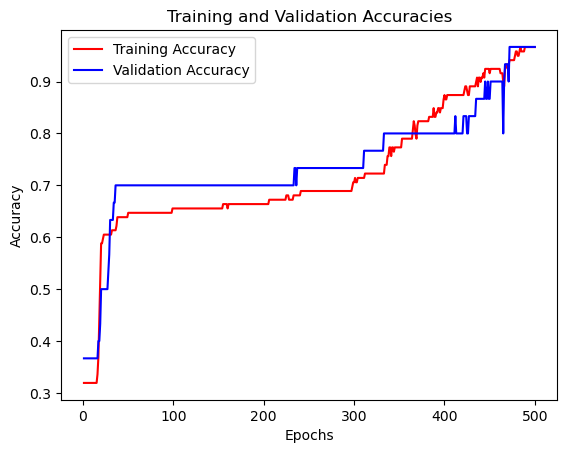

In [29]:
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
pred= model.predict(x)

5/5 [==============================] - 0s 1ms/step


#### Confusion matrix

In [31]:
matrix = confusion_matrix(dummy_y.argmax(axis = 1),pred.argmax(axis = 1))

In [32]:
matrix

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 49]], dtype=int64)

In [33]:
print(classification_report(dummy_y.argmax(axis = 1),pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.90      0.95        50
           2       0.91      1.00      0.95        49

    accuracy                           0.97       149
   macro avg       0.97      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149



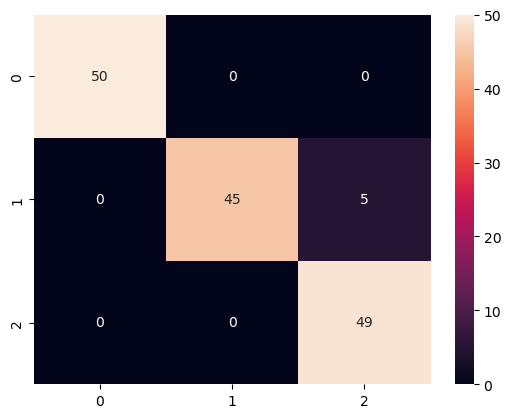

In [34]:
sns.heatmap(matrix,annot=True);